In [16]:
!pip install petroeval

In [1]:
#importing the required module and functions from ...
#the package for a quick formation evaluation

import petroeval
from petroeval import evaluate_reservoir
from petroeval import log_plot
from petroeval import FormationEvaluation
from petroeval import visualizations
from petroeval.visualizations import summary

In [2]:
petroeval.__file__

'/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/__init__.py'

In [3]:
#import well log in las file and convert to dataframe
import lasio
las = lasio.read('WLC_PETRO_COMPUTED_INPUT_1.LAS')
df = las.df()

Header section Parameter regexp=~P was not found.


In [4]:
print(evaluate_reservoir)

<module 'petroeval.evaluate_reservoir' from '/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/evaluate_reservoir.py'>


In [5]:
#create the reservoir section object

reservoir1 = FormationEvaluation(df, 'GR', 'NPHI', 'RHOB', 'RT', 2, 10000, 72)
table = reservoir1.show_table(baseline_default=True)
print(reservoir1)

Default baseline 91.45389829999999 is used for evaluation
ESTIMATED PETROPHYSICAL PARAMETERS


In [17]:
#fill missing values using mean values of the columns, specify value if mean shouldn't be applied

df1 = reservoir1.fill_missing(use_mean=False, value=55)

Filling missing values...


In [12]:
reservoir2 = FormationEvaluation(df1, 'GR', 'NPHI', 'RHOB', 'RT', 2, 10000, 72)

In [13]:
#summary of reservoir parameters estimated

print(visualizations.summary(table))

Title: Petrophysical Summary of the Parameters Evaluated
                GR        LITHO          VSH      NET_PAY        PHIDF  \
count  9997.000000  9999.000000  9997.000000  9999.000000  2717.000000   
mean     82.227914     0.635264     0.379066     0.354735     0.438638   
std      36.974956     0.481380     0.379073     0.478457     0.074355   
min      10.688800     0.000000     0.000000     0.000000     0.153939   
25%      56.037899     0.000000     0.016286     0.000000     0.386061   
50%      81.305603     1.000000     0.243743     0.000000     0.430545   
75%     118.616699     1.000000     0.820253     1.000000     0.487394   
max     161.530197     1.000000     1.000000     1.000000     0.600000   

              PHIE           SW      OIL_SAT  
count  2716.000000  2717.000000  2717.000000  
mean      0.025019     0.161596     0.838404  
std       0.060085     0.038306     0.038306  
min       0.000000     0.006412     0.558058  
25%       0.000000     0.138382     0.825

In [18]:
reservoir2 = FormationEvaluation(df1, 'GR', 'NPHI', 'RHOB', 'RT', 2, 10000, 72)

In [16]:
print(reservoir1.parameters(True))

Default baseline 91.45389829999999 is used for evaluation
ESTIMATED PETROPHYSICAL PARAMETERS
{'Gross rock': 6354, 'The Net to Gross is:': 1.0, 'Net Pay of reservoir:': 6354, 'Total Porosity:': 0.351015744866397, 'Effective Porosity:': 0.19975483929697743, 'Water Saturation:': 0.12010639335249489, 'Oil Saturation:': 0.8798936066475052}


In [19]:
print(reservoir2.parameters(baseline_default=True))

Default baseline 91.45389829999999 is used for evaluation
ESTIMATED PETROPHYSICAL PARAMETERS
{'Gross rock': 6354, 'The Net to Gross is:': 1.0, 'Net Pay of reservoir:': 6354, 'Total Porosity:': 0.351015744866397, 'Effective Porosity:': 0.19975483929697743, 'Water Saturation:': 0.12010639335249489, 'Oil Saturation:': 0.8798936066475052}


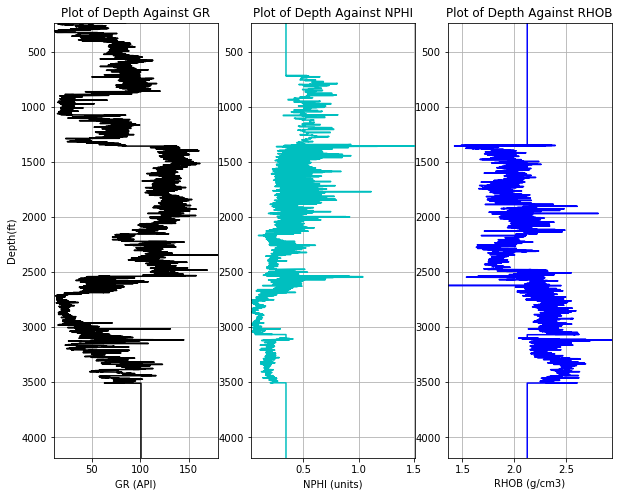

In [23]:
#to display logs for correlation

log_plot(df, GR=True, RT=False, NPHI=True, RHOB=True)

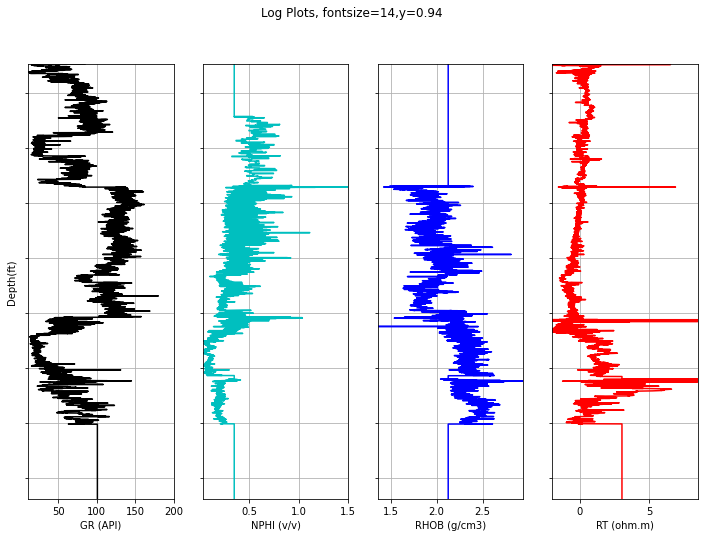

In [21]:
log_plot(df)

In [14]:
df1.describe()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
count,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,...,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000
mean,40.864337,40.864100,40.864087,40.864310,19.043252,41.148959,40.225180,49.543087,55.701494,56.616402,...,41.002901,34.200700,34.642156,3.237899,40.589110,3.394066,31.668401,113.127319,149.674776,113.127319
std,12.604597,12.605318,12.605359,12.604678,6.613720,11.182778,13.849835,12.955107,30.435580,35.598709,...,11.756007,19.527195,56.687604,8.896467,12.969885,9.686844,20.800262,2367.734482,2963.262835,2367.734482
min,2.104600,2.118200,2.090200,2.124700,8.500000,8.360400,-0.022500,45.000000,45.000000,0.149300,...,4.729900,-0.096500,0.072000,0.203200,2.111800,0.179400,0.385600,0.223700,0.290400,0.223700
25%,45.000000,45.000000,45.000000,45.000000,12.250000,45.000000,45.000000,45.000000,45.000000,30.018350,...,45.000000,8.476500,8.772050,0.720100,45.000000,0.759300,21.178250,9.989500,9.046400,9.989500
50%,45.000000,45.000000,45.000000,45.000000,17.500000,45.000000,45.000000,45.000000,45.000000,57.132400,...,45.000000,45.000000,45.000000,1.141700,45.000000,1.168500,29.800200,45.000000,45.000000,45.000000
75%,45.000000,45.000000,45.000000,45.000000,26.000000,45.000000,45.000000,45.000000,45.000000,78.788100,...,45.000000,45.000000,45.000000,1.620900,45.000000,1.694000,34.543150,45.000000,45.000000,45.000000
max,45.000000,45.000000,45.000000,45.000000,36.000000,45.000000,45.000000,125.982700,202.140000,297.767300,...,45.000000,1118.314100,8417.979500,96.427900,45.000000,396.637900,151.127000,97543.421900,97036.406300,97543.421900


nan

In [13]:
import numpy as np